# Use of create_polar_bins function
In this notebook some quick examples of use of **rasmus_lib.create_polar_bins** are demonstrated

## General questions to this (12/10'16):

- I am not entirely sure if more input types are possible/necessary
- Output type might be different if input type is not as specified, I guess that is fine?
- Is my unit for input of pixel_area in docstring correct? (I figured (0.124 μm)^2, but I'd like to be sure)
- I create variables in the function for better readability, does that matter?
- Lastly: I kept the numpy.arrange function - it becomes handy now that I don't define the number of bins anymore ;)

In [10]:
%pylab inline
import PolarX.base_lib as bl
import PolarX.load_data as load_data
import pickle
import xarray as xr
import scipy as sp
import numpy as np
plt.style.use('ggplot')
import skimage

import rasmus_lib as rl

def plotStuff(img,y,x,radius=100):
    imgGray = skimage.color.gray2rgb(img)
    cx, cy = skimage.draw.circle_perimeter(y, x, radius)
    imgGray[cy, cx] = (220, 20, 20)
    imshow(imgGray)
    plt.plot(y,x,'.',markersize=12)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rasmus Hvid\Documents\MedTek\Kurser\modellingBrain\gitRas\toWeb\tifffile.py:278: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


### Creating testData and testData2d for testing of function
 testData2d is plotted for reference

In [11]:
pwd


'C:\\Users\\Rasmus Hvid\\Documents\\MedTek\\Kurser\\modellingBrain\\gitRas\\toWeb'

In [12]:
pkl_file = open("/Users/Rasmus Hvid/Documents/MedTek/Kurser/modellingBrain/gitRas/rasFiles_notOnWeb/x_cut.pkl", 'rb')
data = pickle.load(pkl_file)
pkl_file.close
del pkl_file

testData = data.isel(t = slice(0,1000))
testData2d = testData.mean('t')

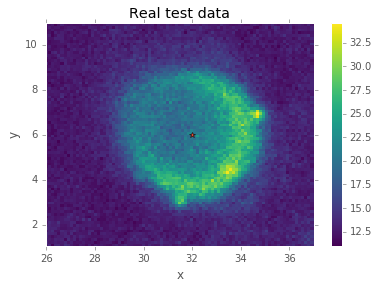

In [13]:
figure()
testData2d.plot()
plot(32, 6,'*')
title('Real test data')

## Multiple different ways of using the function (outcommented)
The simplest use of the function is to only specify number of theta bins (acceptable for standard image sizes only)

In [14]:
#thetaBins, rBins = rl.create_polar_bins(8)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65, r_stop = 8)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65, r_stop = 8, pixel_area = 0.124**2)

thetaBins, rBins = rl.create_polar_bins(8)


data2d_polar   = bl.darray_to_polar(testData2d, origin=(32, 6), bins=(thetaBins, rBins), statistic=np.mean)
data2d_polar_n = bl.darray_to_polar(testData2d, origin=(32, 6), bins=(thetaBins, rBins), statistic=np.size)

## Plotting of results

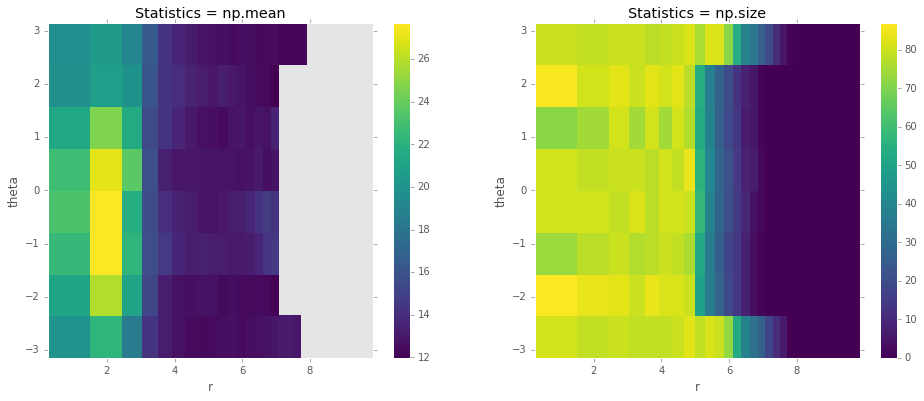

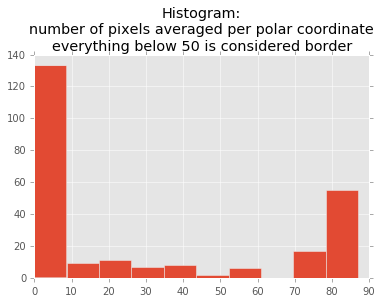

In [15]:
fig, ax = subplots(1, 2, figsize=(16, 6));
data2d_polar.plot(ax = ax[0]);
ax[0].title.set_text('Statistics = np.mean');
data2d_polar_n.plot(ax = ax[1]);
ax[1].title.set_text('Statistics = np.size');

figure()
plt.hist(np.ravel(data2d_polar_n.values));
title('Histogram:\nnumber of pixels averaged per polar coordinate\neverything below 50 is considered border');

In [16]:
pwd

'C:\\Users\\Rasmus Hvid\\Documents\\MedTek\\Kurser\\modellingBrain\\gitRas\\toWeb'

# Center estimation by Hough transform

In [17]:
img = sp.misc.imread("circleReal.png", mode = 'L')
img = img[20:390,40:390]
hough_radii = arange(95,105,1)

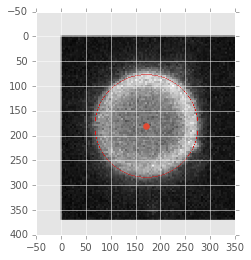

In [18]:
# Use of function
x1, y1, radius1 = rl.estimate_center_h(img, hough_radii)

figure()
plotStuff(img,x1,y1,radius1)

In [24]:
img = load_data.load_pickle("/Users/Rasmus Hvid/Documents/MedTek/Kurser/modellingBrain/gitRas/rasFiles_notOnWeb/data_example/02_08_16_c3.p")

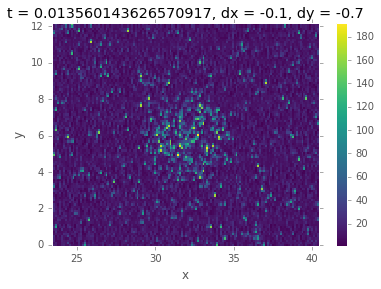

In [27]:
# go go create test images and explore what the test data is...